This notebook calculates the `threshold` parameter for MEXCLP.

We assume that any sort of success probability is assumed to be 90\% (e.g., the `success_prob` for queueing constraints is 90%, we aim to achieve 90% coverage 9 or 15 minutes, we're interested in knowing the 90th percentile of response times). Thus, when calculating `threshold` in MEXCLP, we are specifically calculating the distance at which 90\% of calls can be reached within a time limit, according to simulation.

In [1]:
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from ems_data import *
from simulation import Simulation

In [2]:
with open('ems_data.pkl', 'rb') as f:
    ems_data = pickle.load(f)
# Even though region doesn't matter, need to set it to instantiate Simulation
ems_data.region_id = 1
sim = Simulation(ems_data, seed=0)

def estimate_response_time_percentile(distance, q=90, n_samples=100000):
    response_times = (
        sim.sample_pretravel_delay(size=n_samples)
        + sim.sample_travel_time(distance, size=n_samples)
    )
    return np.percentile(response_times, q)

print("90th percentile response times for")
for distance in [3, 4, 11, 12]:
    print(f"\t{distance} km: {estimate_response_time_percentile(distance)} minutes")

90th percentile response times for
	3 km: 8.480240689043804 minutes
	4 km: 9.288040958852573 minutes
	11 km: 14.583998648487162 minutes
	12 km: 15.329693993540719 minutes


100%|██████████| 11/11 [00:06<00:00,  1.65it/s]


(<Figure size 1000x1500 with 2 Axes>,
 <Axes: title={'center': '90th Percentile Response Time'}, xlabel='Distance (km)', ylabel='Response Time (minutes)'>)

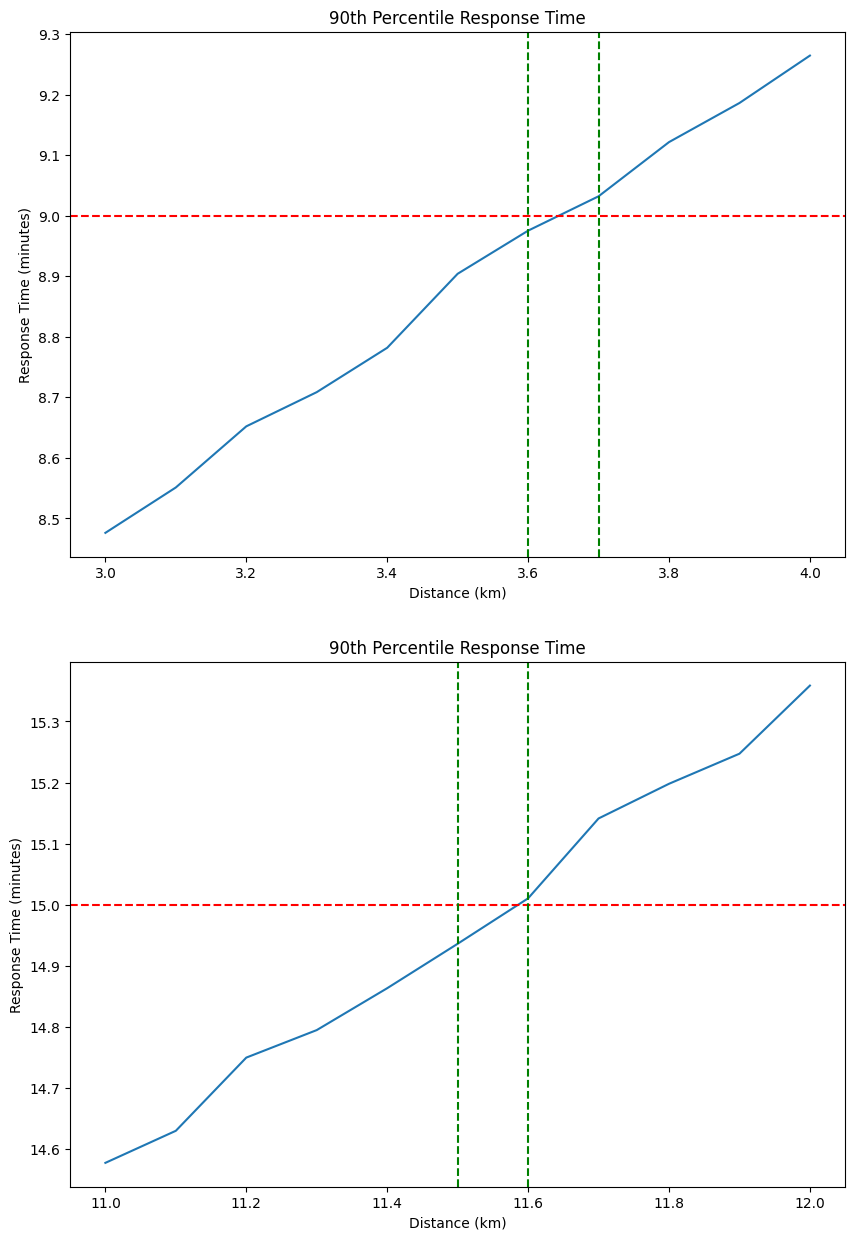

In [3]:
# Because function is stochastic, we won't use scipy.optimize to find the root
# Instead, we'll plot a range and zoom in
def plot_response_time_percentile(x, q=90, target=None, n_samples=100000, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
    y = np.array([
        estimate_response_time_percentile(distance, q, n_samples)
        for distance in tqdm(x)
    ])
    ax.plot(x, y)
    if target is not None:
        ax.axhline(target, color='r', linestyle='--')
        lb = x[np.where(y > target)[0][0] - 1]
        ub = x[np.where(y < target)[0][-1] + 1]
        ax.axvline(lb, color='g', linestyle='--')
        ax.axvline(ub, color='g', linestyle='--')
    ax.set_title(f"{q}th Percentile Response Time")
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Response Time (minutes)")
    return fig, ax

fig, axes = plt.subplots(2, figsize=(10, 15))
plot_response_time_percentile(np.linspace(3, 4, 11), target=9, ax=axes[0])
plot_response_time_percentile(np.linspace(11, 12, 11), target=15, ax=axes[1])

100%|██████████| 11/11 [00:13<00:00,  1.22s/it]


(<Figure size 1000x1500 with 2 Axes>,
 <Axes: title={'center': '90th Percentile Response Time'}, xlabel='Distance (km)', ylabel='Response Time (minutes)'>)

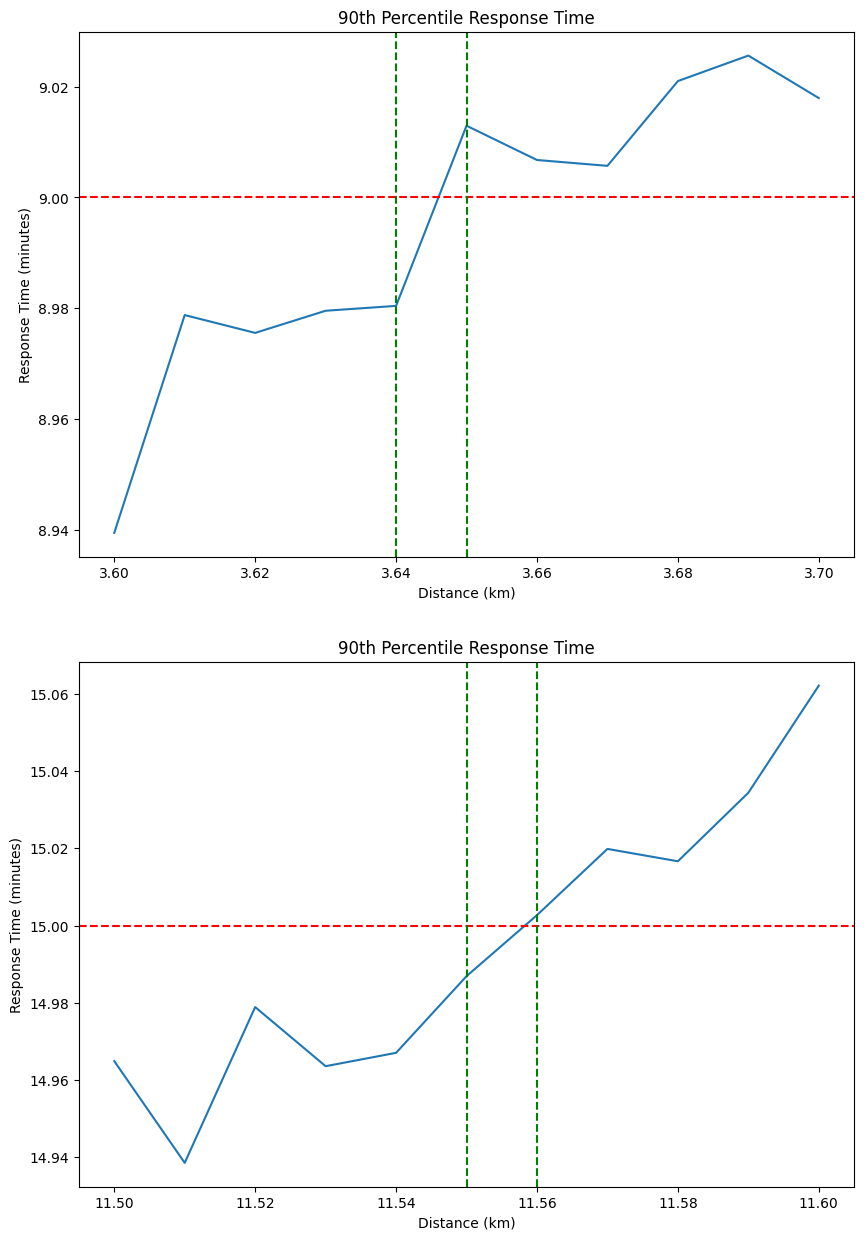

In [4]:
fig, axes = plt.subplots(2, figsize=(10, 15))
plot_response_time_percentile(np.linspace(3.6, 3.7, 11), target=9, n_samples=200000, ax=axes[0])
plot_response_time_percentile(np.linspace(11.5, 11.6, 11), target=15, n_samples=200000, ax=axes[1])

100%|██████████| 5/5 [00:30<00:00,  6.06s/it]


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '90th Percentile Response Time'}, xlabel='Distance (km)', ylabel='Response Time (minutes)'>)

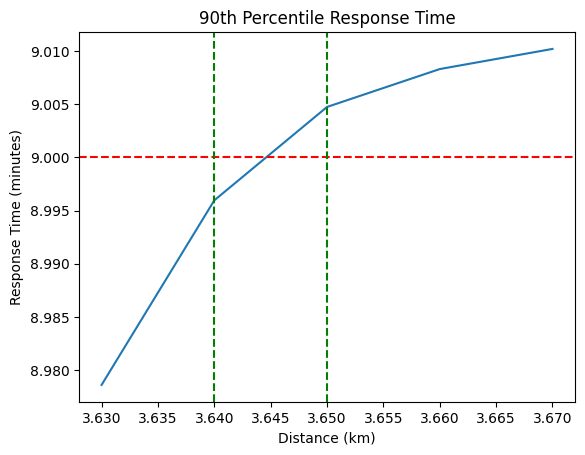

In [5]:
plot_response_time_percentile(np.linspace(3.63, 3.67, 5), target=9, n_samples=1000000)